# Business Case: Aerofit - Descriptive Statistics & Probability

### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:


|Feature|Possible Values|
|-------|---------------|
|Product Purchased |KP281, KP481, or KP781|
|Age|	In years|
|Gender|Male/Female|
|Education|	In years|
|MaritalStatus|	Single or partnered|
|Usage|The avg. no. of times customer plans to use the treadmill each week.|
|Income|Annual income (in $)|
|Fitness|Self-rated fitness on a 1-to-5 scale (1-poor shape & 5-excellent shape.)|
|Miles|The avg. no. of miles the customer expects to walk/run each week|

### Product Portfolio:
  - The KP281 is an entry-level treadmill that sells for dollar 1,500
  - The KP481 is for mid-level runners that sell for dollar 1,750.
  - The KP781 treadmill is having advanced features that sell for dollar 2,500.
 
  

### Importing the required libraries or packages for EDA 

In [96]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Utility Functions - Used during Analysis

#### Missing Value - Calculator

In [97]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md

### Categorical Variable Analysis 
  - Bar plot - Frequency of feature in percentage
  - Pie Chart

In [98]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'white')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("crest"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1


### Function for Outlier detection
  - Box plot - for checking range of outliers
  - distplot - For checking skewness

In [99]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12,family = "Comic Sans MS")
        sns.boxplot(y = df[var],color='m',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='m',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

### Function for Bi-variante Analysis
  - Used countplot for the analysis

In [100]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
        string = " based Distribution"
    plt.show()

###  Function Bi Multi variant Analysis for Numericals variables with Categrical and dependent variable
  - Used Boxplot 
  - Point plot

In [101]:
def num_mult_analysis(df,colname,category,groupby,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, hue = groupby,data = df,ax=ax[rows][0])
        sns.pointplot(x=df[category],y=df[var],hue=df[groupby],ax=ax[rows][1]) 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()

In [102]:
aerofit_data = pd.read_csv("./aerofit_treadmill.csv")

In [103]:
aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [104]:
aerofit_data.shape

(180, 9)

In [105]:
aerofit_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Validating Duplicate Records

In [106]:
aerofit_data = aerofit_data.drop_duplicates()
aerofit_data.shape

(180, 9)

### Inference
  - No dupicates records found.

### Missing Data Analysis

In [107]:
missingValue(aerofit_data).head(5)

Total records =  180


,Total Missing,In Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0


### Inference
  - No missing value found.

### Unique values (counts) for each Feature

In [108]:
aerofit_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Unique values (names) are checked for each Features

In [109]:
aerofit_data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [110]:
aerofit_data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [111]:
aerofit_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [112]:
aerofit_data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [113]:
aerofit_data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [114]:
aerofit_data['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [115]:
aerofit_data['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [116]:
aerofit_data['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [117]:
aerofit_data['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

### Inference
  - No abnormalities were found in the data.

### DataType Validation

In [118]:
aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.1+ KB


### Inference
  - **Product, Gender and MaritalStatus** are categorial variables. Hence updating the dtype for same.

In [119]:
aerofit_data['Gender'] = aerofit_data['Gender'].astype("category")

In [120]:
aerofit_data['Product'] = aerofit_data['Product'].astype("category")

In [121]:
aerofit_data['MaritalStatus'] = aerofit_data['MaritalStatus'].astype("category")

### Analyzing basic statistics about each feature, such as count, min, max, and mean

In [122]:
aerofit_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Inferences

  - Huge difference in **income for customers** who purchase treadmills. Ranging between USD 29562 to 104581.

## Data Preparation

### Dervied Columns¶
  - Added 2 new feature from Age
    - "AgeCategory" - Teens, 20s, 30s and Above 40s
    - "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60
  - Added 1 new categorial feature based on the income
    - "IncomeSlab" - Low Income, Lower-middle income,Upper-Middle income and High income

### Age Category & Age Group

In [123]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
aerofit_data['AgeGroup'] = pd.cut(aerofit_data['Age'], bins)
aerofit_data['AgeCategory'] = pd.cut(aerofit_data['Age'], bins,labels=labels)

In [124]:
aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


### Income Slab

In [125]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
aerofit_data['IncomeSlab'] = pd.cut(aerofit_data['Income'],bins_income,labels = labels_income)
aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Lower-middle income


In [126]:
aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   AgeGroup       180 non-null    category
 10  AgeCategory    180 non-null    category
 11  IncomeSlab     180 non-null    category
dtypes: category(6), int64(6)
memory usage: 11.9 KB


## Univariante Analysis
  - Numerical Variables
    - Outlier Detection
  - Categorial variables 
    - Product
    - Gender
    - MaritalStatus
    - AgeGroup
    - AgeCategory
    - IncomeSlab

### Numerical Variables - Outlier detection
 - Income
 - Miles

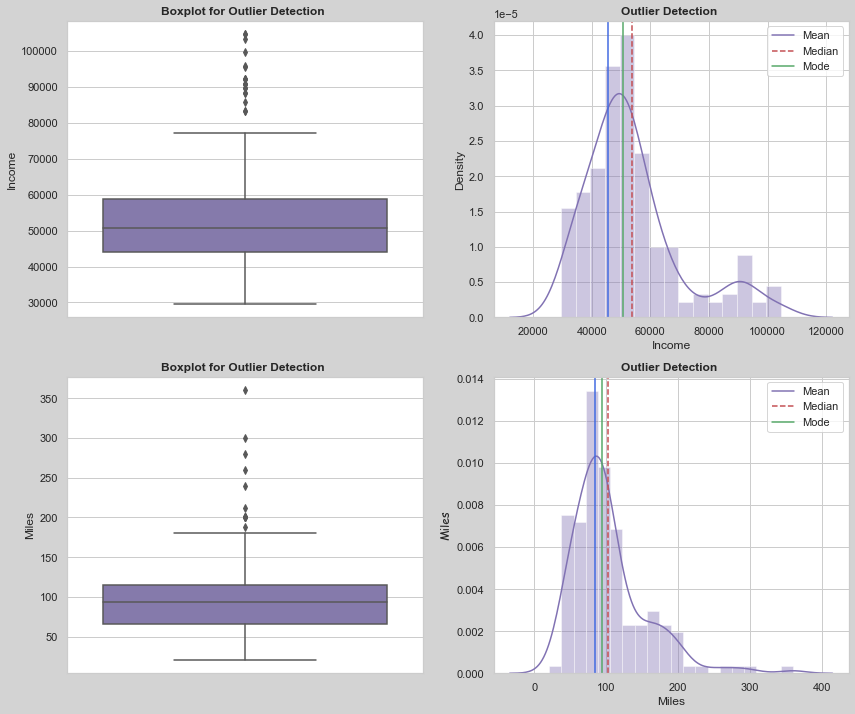

In [127]:
col_num = [ 'Income', 'Miles']
outlier_detect(aerofit_data,col_num,2,2,14,12)

### Inference
  -  Both Miles and Income have significant outliers based on the above boxblot.
  -  Also both are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
  - **Majority of Customers** fall within the **USD 45,000 - USD 60,000** range
  - There are **outliers over USD 85,000**
  - Only a few of our customers run more than 180 miles per week

### Handling outliers

In [128]:
aerofit_data_v1 = aerofit_data.copy()

### Removing outliers for Income Feature

In [129]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = aerofit_data_v1['Income'].quantile(0.75)
Q1 = aerofit_data_v1['Income'].quantile(0.25)
IQR = Q3-Q1
aerofit_data_v1 = aerofit_data_v1[(aerofit_data_v1['Income'] > Q1 - 1.5*IQR) & (aerofit_data_v1['Income'] < Q3 + 1.5*IQR)]
plt.show()

### Removing outliers for the Mile Feature

In [130]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = aerofit_data_v1['Miles'].quantile(0.75)
Q1 = aerofit_data_v1['Miles'].quantile(0.25)
IQR = Q3-Q1
aerofit_data_v1 = aerofit_data_v1[(aerofit_data_v1['Miles'] > Q1 - 1.5*IQR) & (aerofit_data_v1['Miles'] < Q3 + 1.5*IQR)]
plt.show()

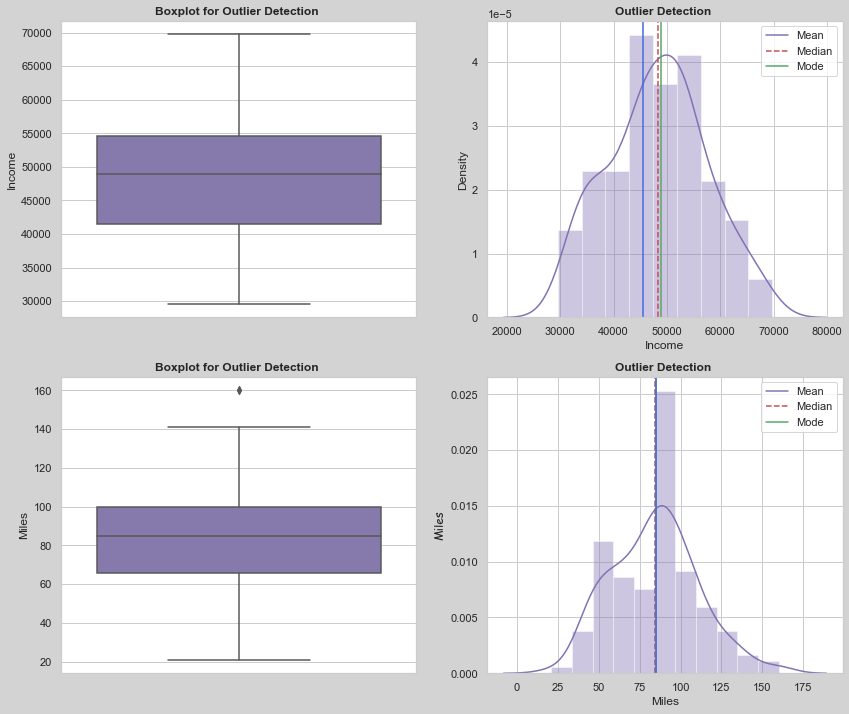

In [131]:
col_num = [ 'Income', 'Miles']
outlier_detect(aerofit_data_v1,col_num,2,2,14,12)

In [132]:
aerofit_data_v1.shape

(147, 12)

### Inferences
  - It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

### Categorical variable Uni-variante Analysis

In [133]:
aerofit_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgeGroup', 'AgeCategory', 'IncomeSlab'],
      dtype='object')

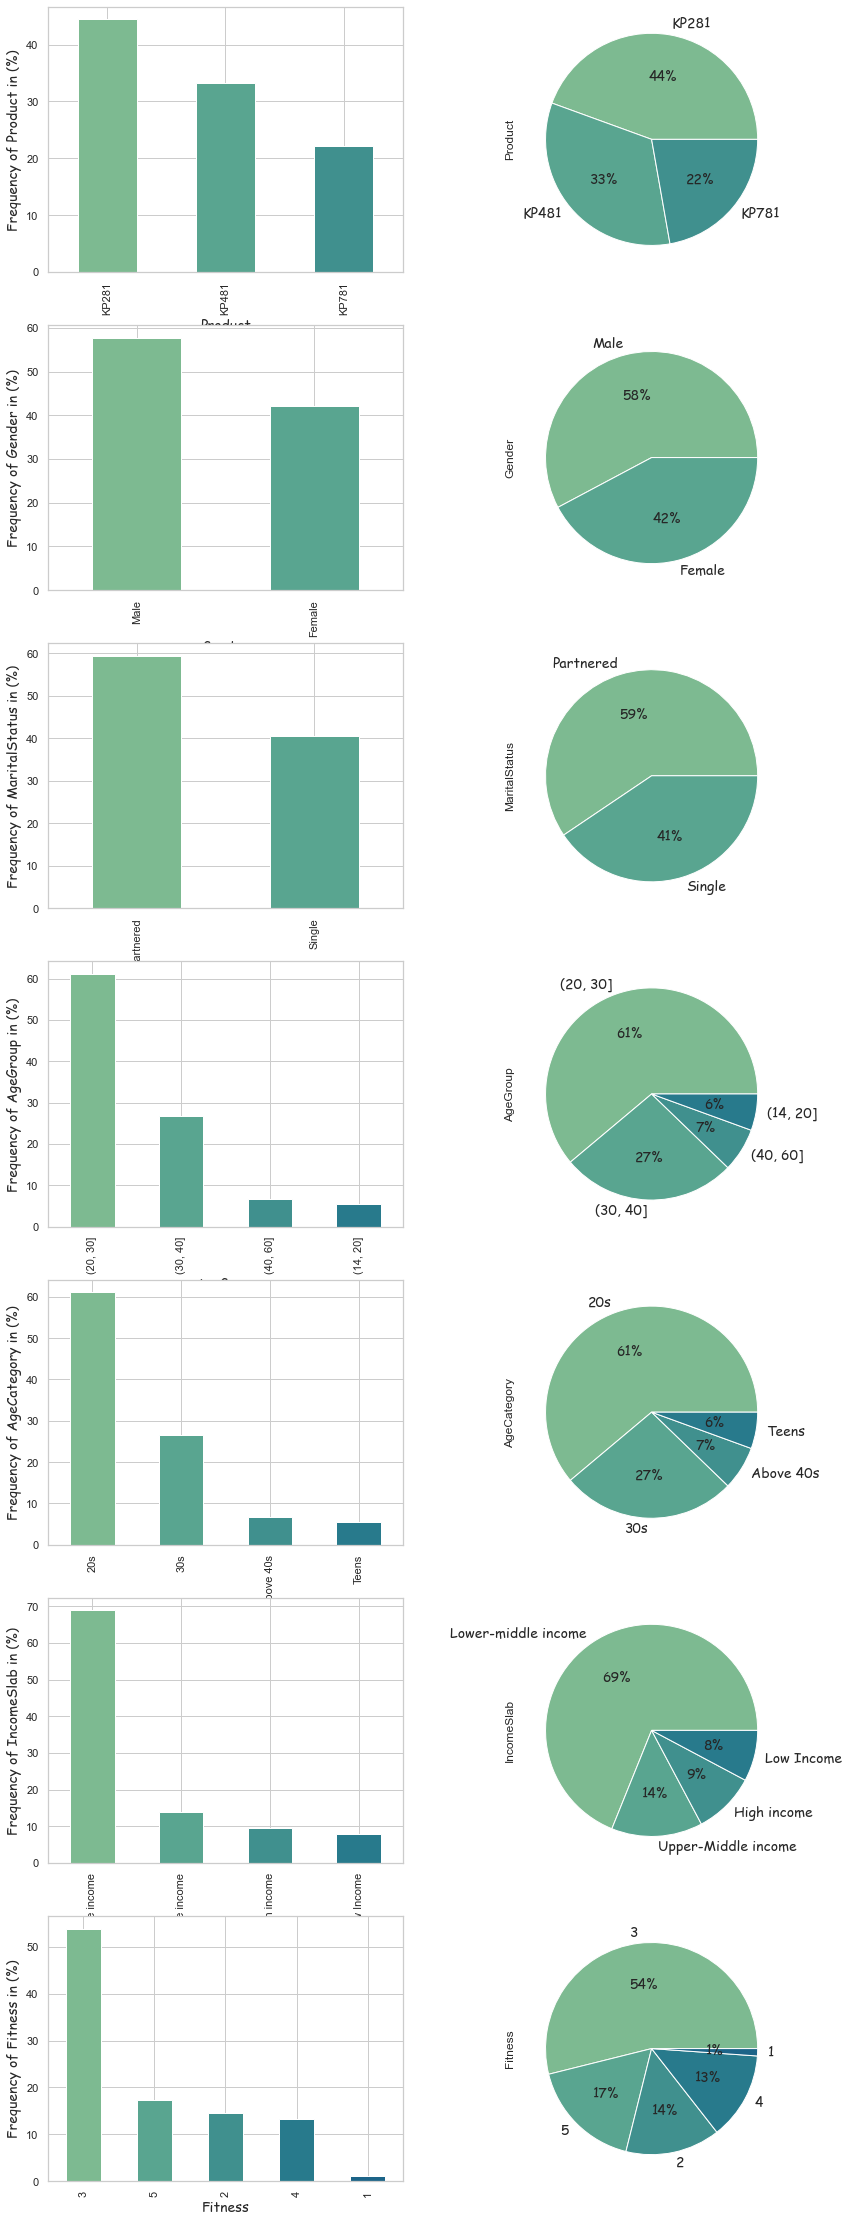

In [134]:
cat_colnames = ['Product', 'Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness']
cat_analysis(aerofit_data,cat_colnames,7,2,14,40)

### Inferences 
  - **83%** of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD dollars 60,000-85000.
  - **88%** of treadmills are purchased by customers aged 20 to 40.
  - The treadmills are more likely to be purchased by married people
  - Model KP281 is the best-selling product
  - **Customer with fitness level 3** buy major chuck of treadmills. **(54%)**
  - Breakdown of Products based on customer purchased -
    - KP281 - **44%**
    - KP481 - **33%**
    - KP781 - **22%**

## Bi-Variant Analysis 
  - Categorical variables
    - Gender
    - MaritalStatus
    - AgeGroup
    - AgeCategory
    - IncomeSlab

### Bivariant analysis for Categorical variables

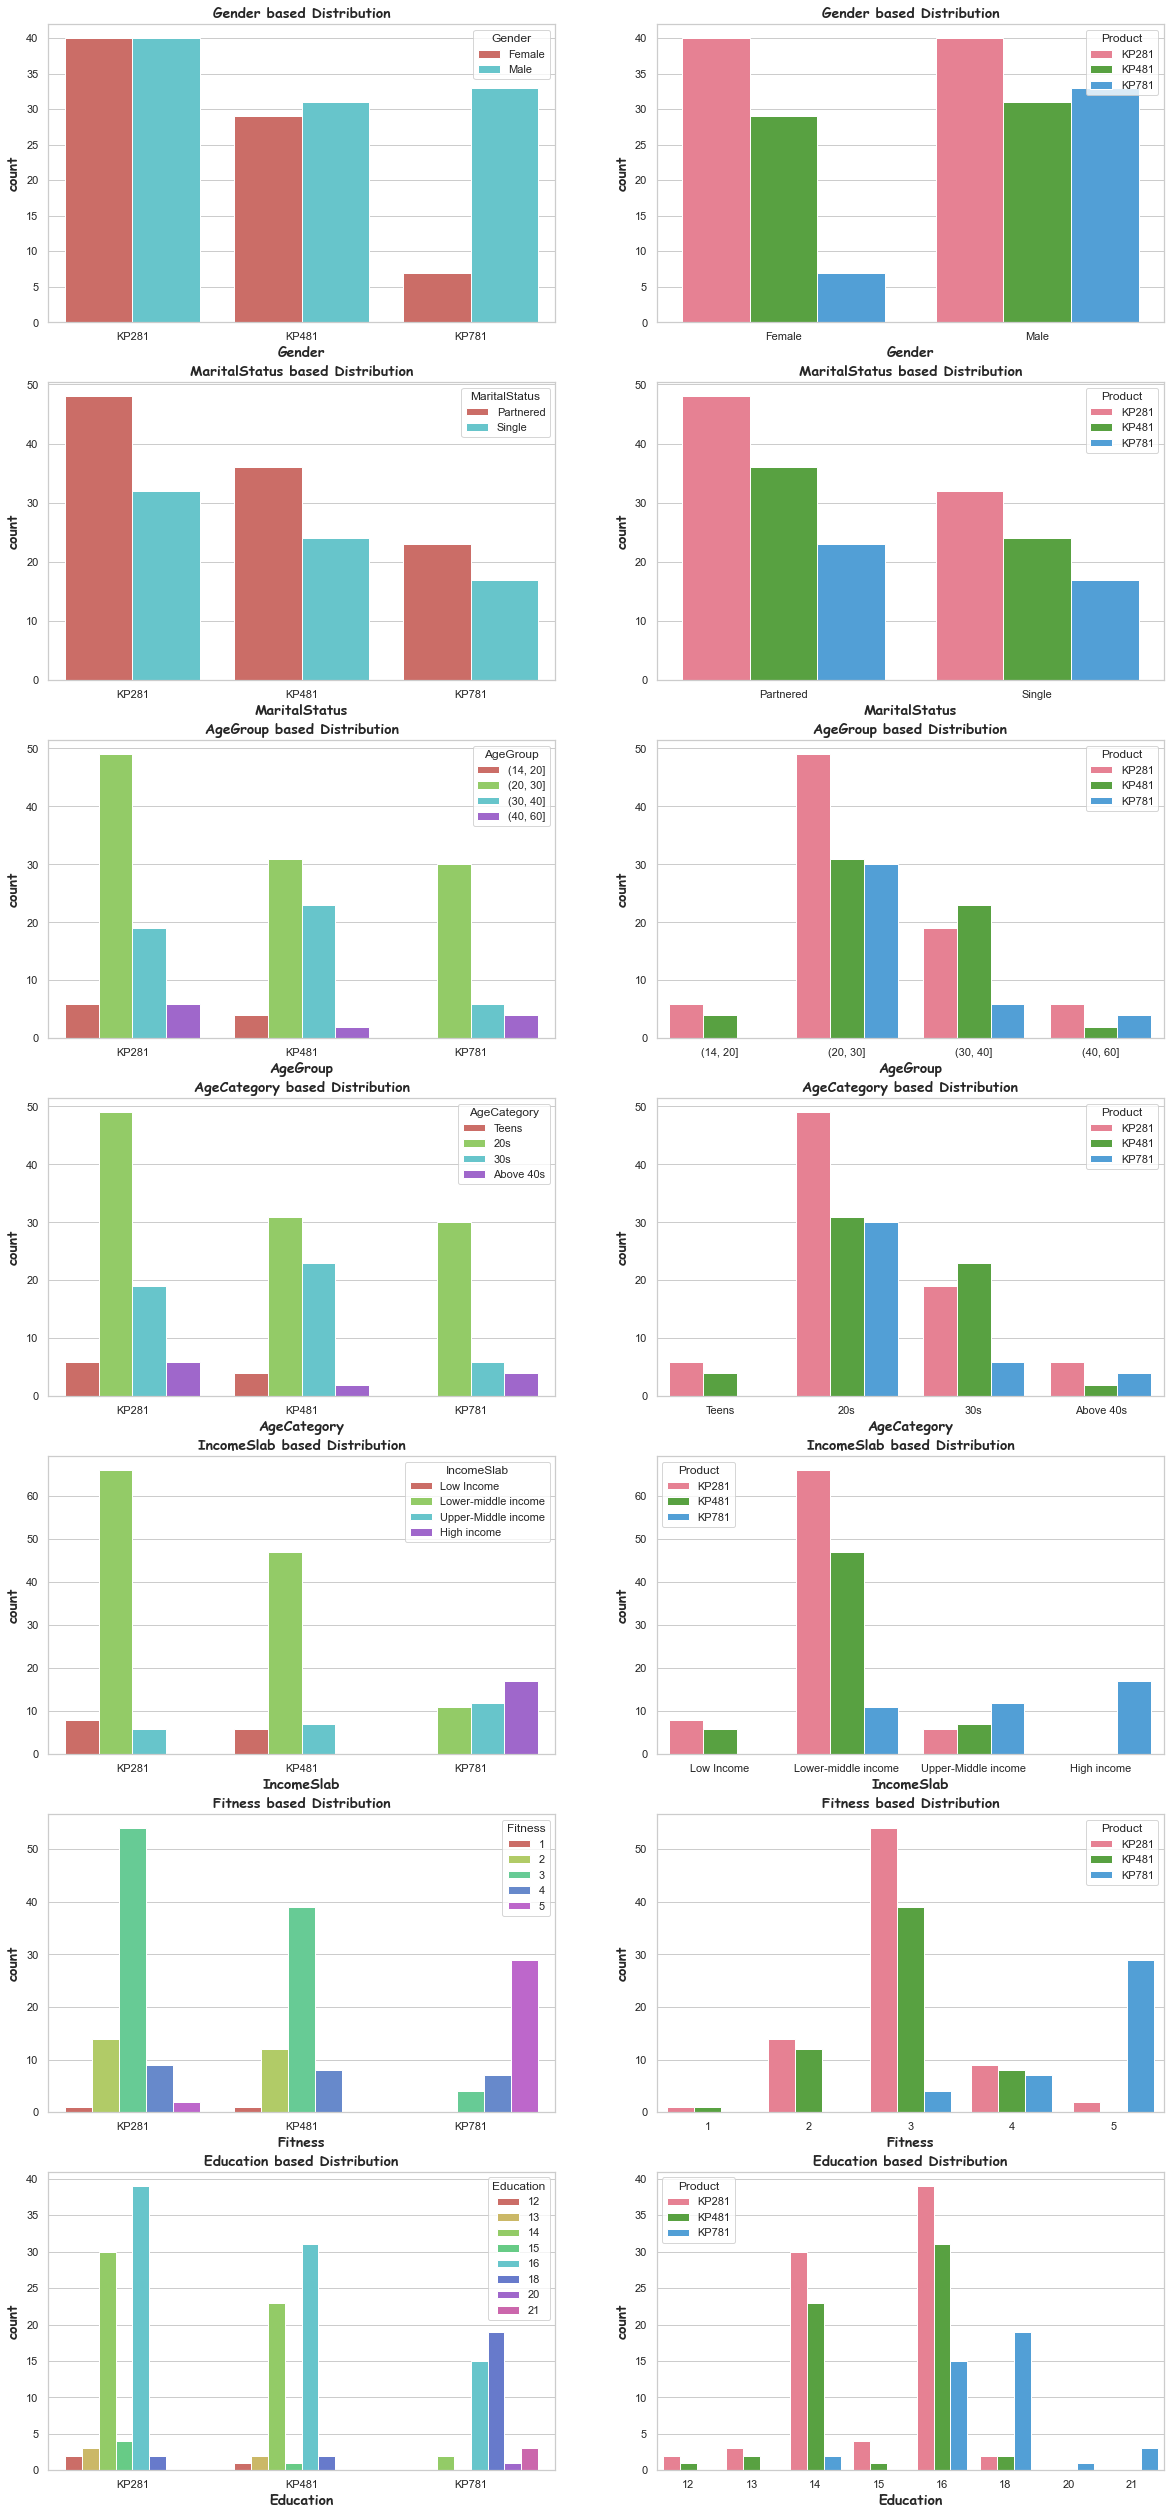

In [135]:
col_names = ['Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness','Education']
cat_bi_analysis(aerofit_data,col_names,'Product',7,2,20,45)

### Inferences 
  - **Gender**
    - **KP781 model** is the most popular among males
    - **KP281** is equally preferred by men and women
  - **AgeCategory**
    - The most useful treadmills product for people **over 40s** is the **KP281 & KP781**.However, they buy fewer treadmills.
  - **Income**
    - Customer with high income only buy high end model. **(KP781)**
  - **Fitness Level**
    - Customers with 5 fitness level prefer using KP781.(High end Model)
    - With moderate fitness level , customer prefer using KP281.
  - **Education**
    - Customer above 20 years education, purchase only **KP781** model.
    
  - The other categorical features show no specific trends.

### Bivariante Analysis for Numerical variables

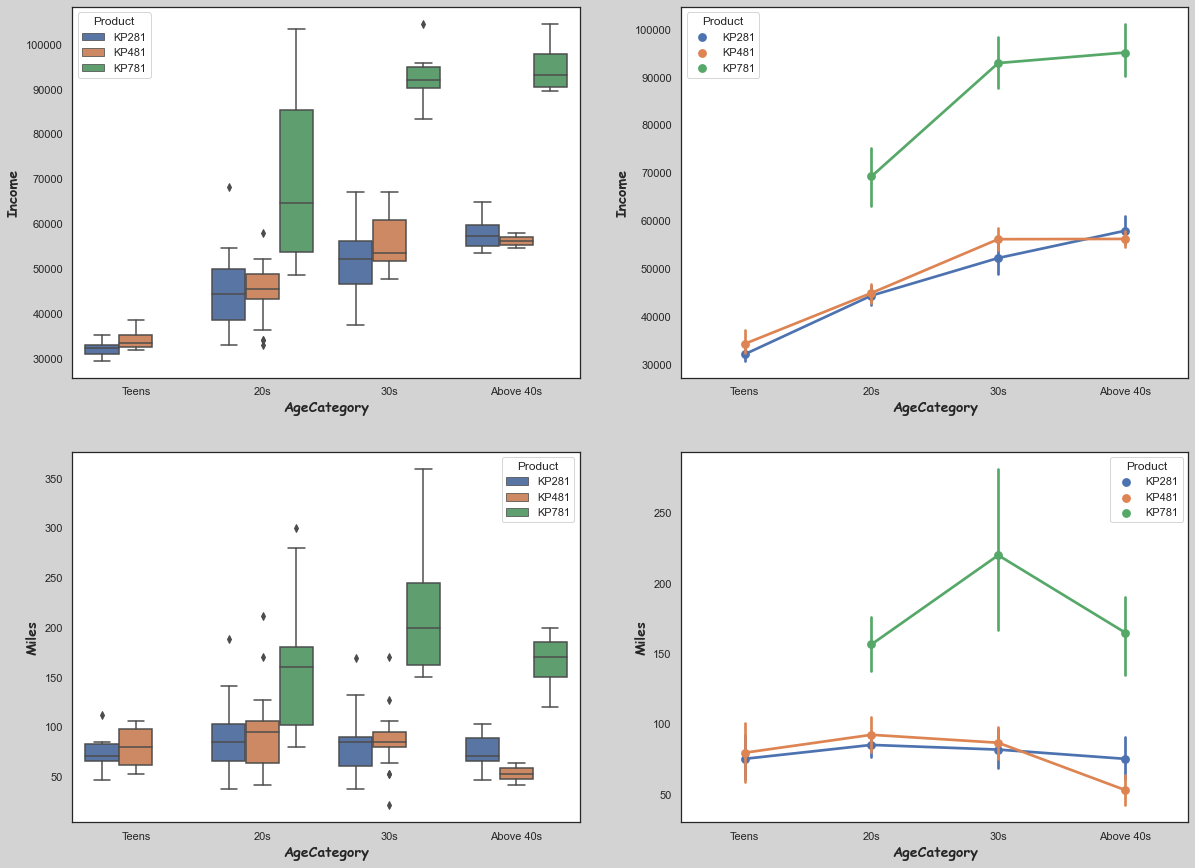

In [136]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(aerofit_data,col_num,"AgeCategory","Product")

### Inferences
 - Customers using KP781 treadmill model runs more miles.

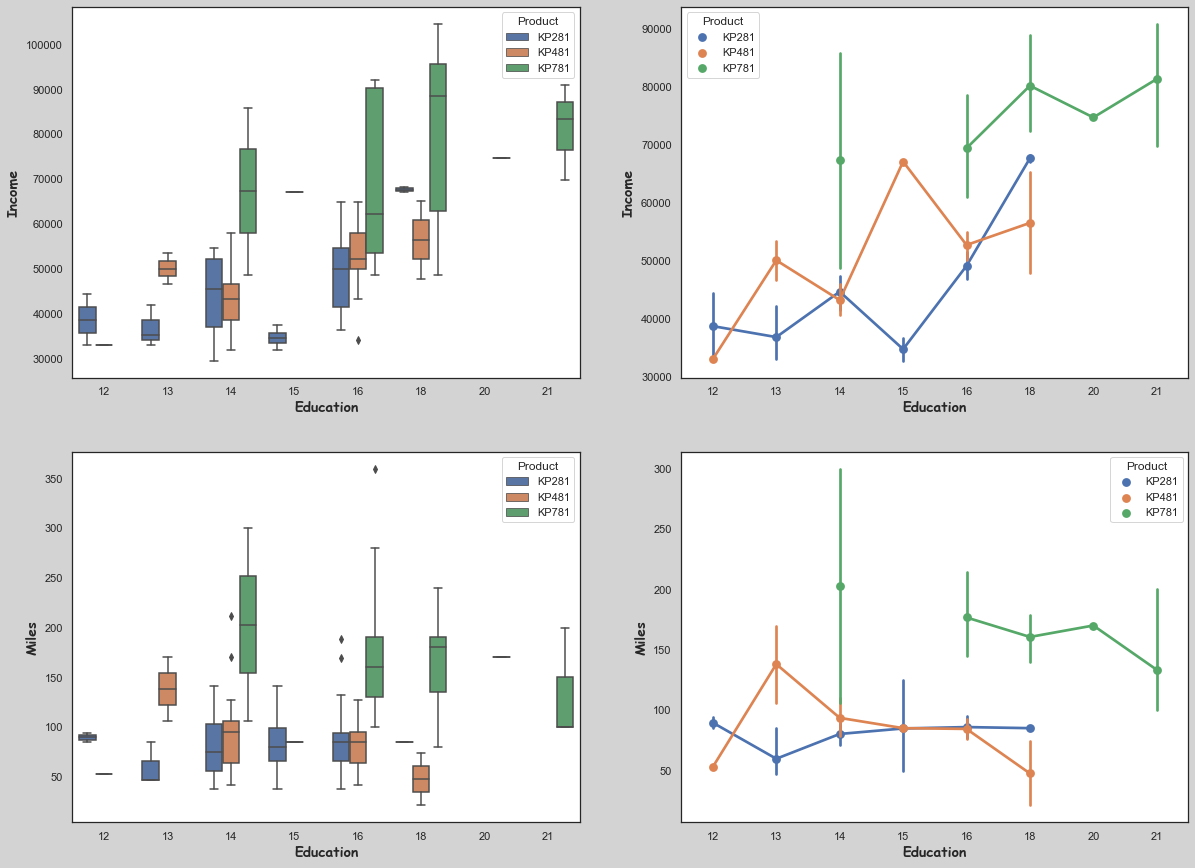

In [137]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(aerofit_data,col_num,"Education","Product")

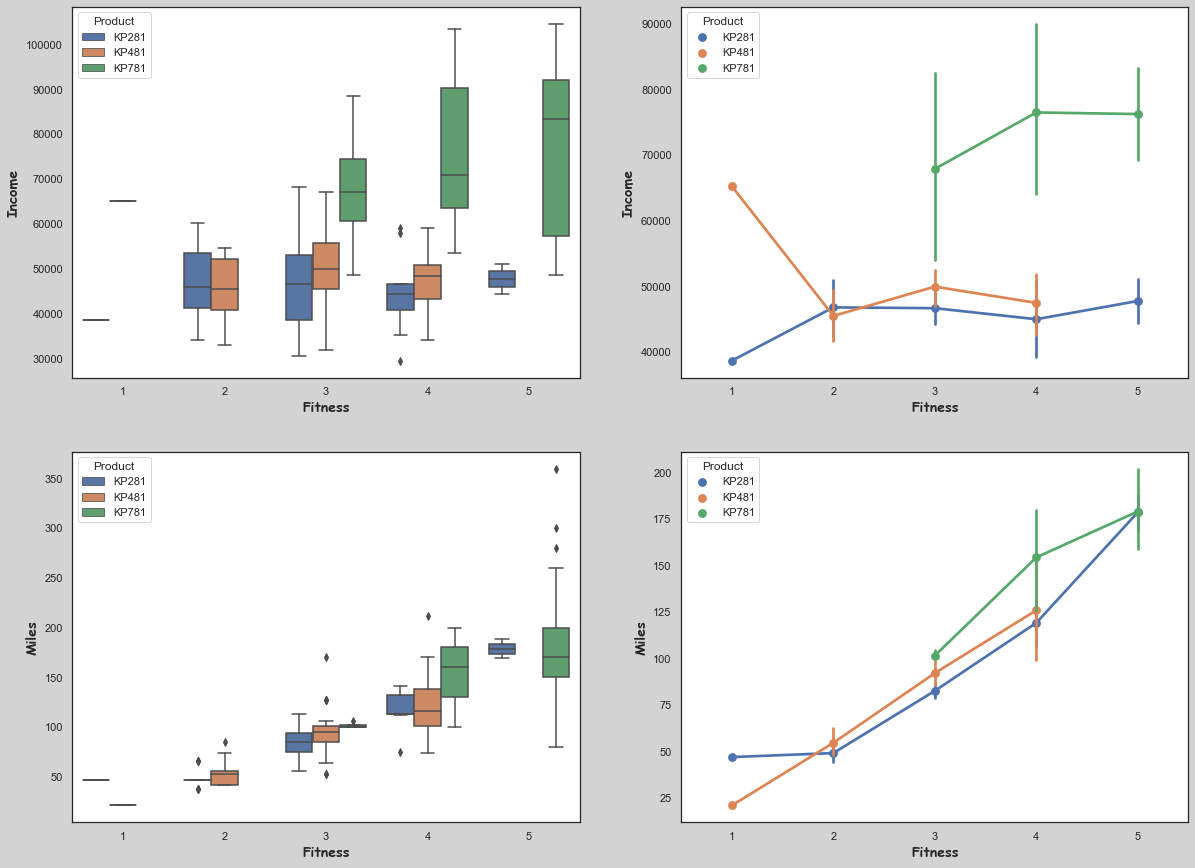

In [138]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(aerofit_data,col_num,"Fitness","Product")

### Inferences 
  - With Fitness level 4 and 5 tend to use High end models and average number of Miles is very high for the customers.

### Correlation between different Numerical variables

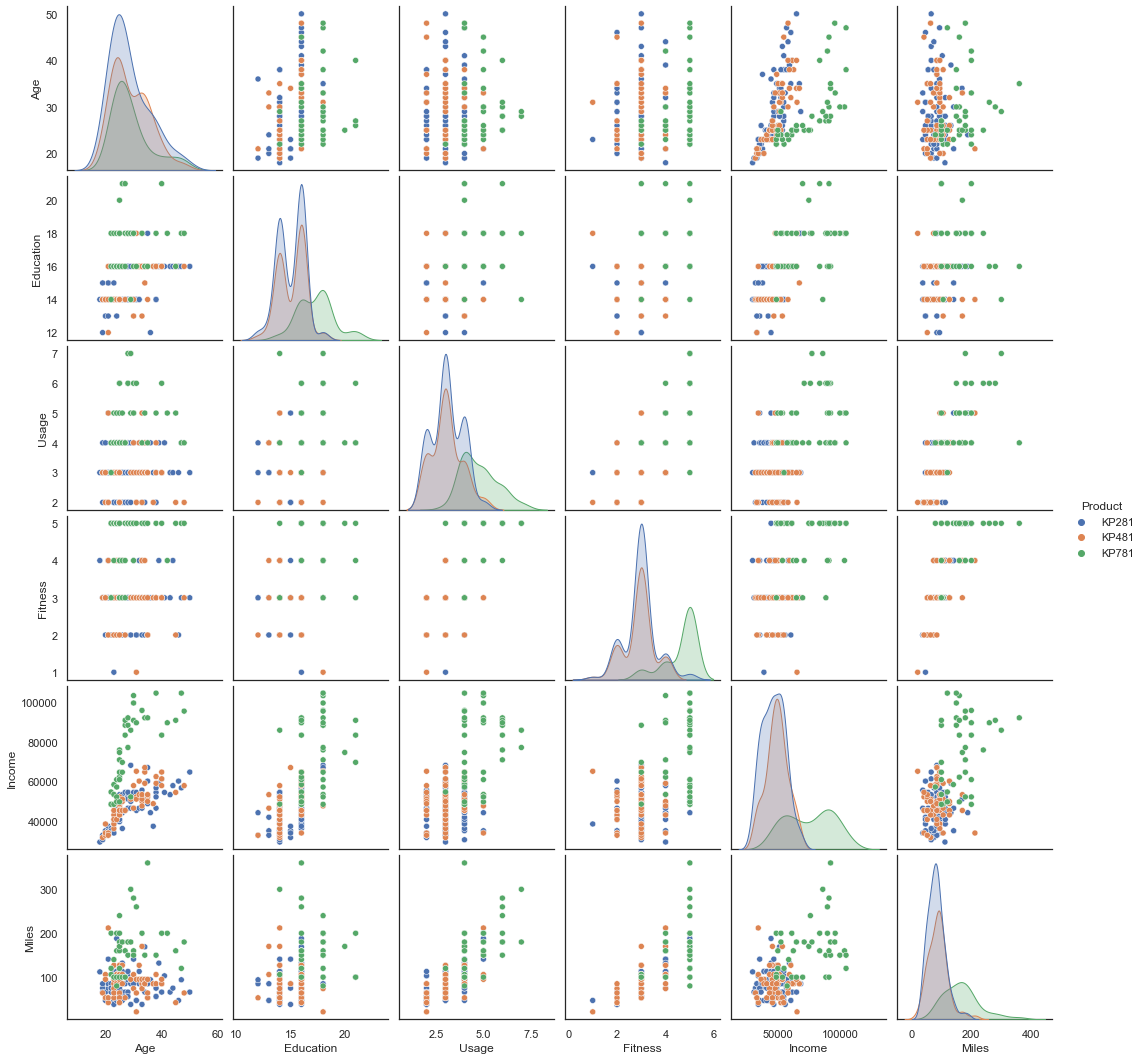

In [139]:
sns.pairplot(aerofit_data, hue='Product')
plt.show()

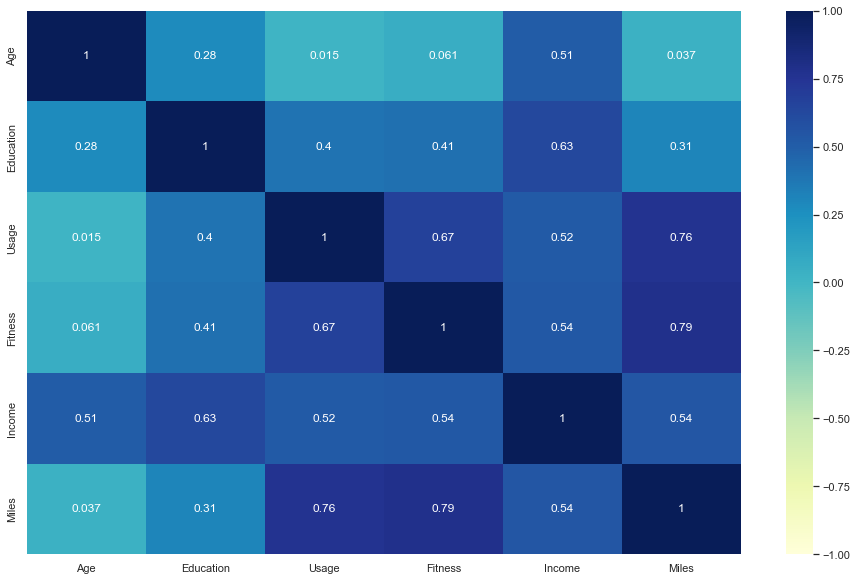

In [140]:
plt.figure(figsize = (16, 10))
sns.heatmap(aerofit_data.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu") 
plt.show()

### Inferences
  - **Miles and Fitness** and **Miles and Usage** are highly correlated, which means if a customer's fitness level is high they use more treadmills.
  - **Income and education** show a strong correlation. High-income and highly educated people prefer high-end models (KP781), as mentioned during Bivariant analysis of Categorical variables.
  - There is no corelation between **Usage & Age** or **Fitness & Age** which mean Age should not be barrier to use treadmills or specific model of treadmills.

### Analysis using Contingency Tables to Calculate Probabilities
#### (**Marginal Probabilities, Joint Probabilities, Conditional Probabilities**)

 - Product - Incomeslab
 - Product - Gender
 - Product - Fitness
 - Product - AgeCategory
 - Product - Marital Status


In [141]:
aerofit_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgeGroup', 'AgeCategory', 'IncomeSlab'],
      dtype='object')

### Product - Income

In [142]:
pd.crosstab(index=aerofit_data['Product'], columns=[aerofit_data['IncomeSlab']],margins=True) 

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


#### Percentage of a low-income customer by total no. of customers (Marginal Probability)

In [143]:
# Summ of the treadmill purchased by Low-income customer by total no. of customers.
round(14/180,2)*100

8.0

#### Percentage of a high-income customer purchasing a treadmill (Marginal Probability)

In [144]:
# Summ of the treadmill purchased by high income customer by total no. of customers.
round(17/180,2)*100

9.0

#### Percentage of a High-income customer purchasing KP781 treadmill (Joint Probability)

In [145]:
# Summ of the treadmill with model KP781 purchased by high income customer by total no. of customers.
round(17/180,2)*100

9.0

#### Percentage of customer with high-Income salary buying treadmill given that Product is KP781 (Conditional Probability)

In [146]:
round(17/17,2)*100

100.0

### Inference 
  - Customers having salary more than **USD dollar 85,000 buys only KP781** (high-end Model). 

### Product - Gender

In [147]:
pd.crosstab(index=aerofit_data['Product'], columns=[aerofit_data['Gender']],margins=True) 

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


#### Percentage of a Male customer purchasing a treadmill

In [148]:
prob = round((104/180),2)
pct = round(prob*100,2)
pct

58.0

#### Percentage of a Female customer purchasing KP781 treadmill

In [149]:
prob = round((7/180),2)
pct = round(prob*100,2)
pct

4.0

#### Percentage of Female customer buying treadmill given that Product is KP281

In [150]:
prob = round((40/76),2)
pct = round(prob*100,2)
pct

53.0

### Inference 
  - Female customer prefer to buy KP281 & KP481
  - 53% of female tend to purchase treadmill model KP281

### Product - Fitness

In [151]:
pd.crosstab(index=aerofit_data['Product'], columns=[aerofit_data['Fitness']],margins=True) 

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


#### Percentage of a customers having fitness level5 are

In [152]:
prob = round((31/180),2)
pct = round(prob*100,2)
pct

17.0

#### Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill 

In [153]:
prob = round((29/180),2)
pct = round(prob*100,2)
pct

16.0

#### Percentage of customer with fitness level-5 buying KP781 treadmill given that Product is KP781

In [154]:
prob = round((29/31),2)
pct = round(prob*100,2)
pct

94.0

### Inference 
  - 94% of customers with fitness level 5, purchased KP781

### Product - AgeCategory

In [155]:
pd.crosstab(index=aerofit_data['Product'], columns=[aerofit_data['AgeCategory']],margins=True) 

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [156]:
prob = round((110/180),2)
pct = round(prob*100,2)
pct

61.0

### Inference
  - Teen doesnot prefer to buy KP781
  - 61% of customer with Age group between 20 and 30 purchase treadmills.

### Product - Marital Status

In [157]:
pd.crosstab(index=aerofit_data['Product'], columns=[aerofit_data['MaritalStatus']],margins=True) 

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [158]:
prob = round((107/180),2)
pct = round(prob*100,2)
pct

59.0

### Inferences 
  - 59 percent of customer with maritial Stuatus as Partnered by the treadmills.

## Conclusion (Important Observations):

  - Model **KP281** is the **best-selling product**. **44.0%** of all treadmill **sales go to model KP281.**
  - The majority of treadmill customers fall within the **USD 45,000 - USD 80,000** income bracket. **83%** of treadmills are bought by individuals with incomes between **USD dollor 35000 and 85000.**
  - There are only **8%** of customers with **incomes below USD 35000** who buy treadmills.
  - **88%** of treadmills are purchased by **customers aged 20 to 40.**
  - **Miles and Fitness** & **Miles and Usage** are highly correlated, which means if a customer's fitness level is high they use more treadmills.
  - **KP781** is the only model purchased by a customer who has more than **20 years of education and an income of over USD dollor 85,000.**
  - With **Fitness level 4 and 5,** the customers tend to use **high-end models** and the **average number of miles is above 150 per week** 

## Recommendations
  - **KP281 & KP481** are popular with customers earning **USD 45,000 and USD 60,000** and can be offered by these companies as **affordable models.**
  - **KP781** should be marketed as a **Premium Model** and marketing it to **high income groups and educational over 20 years** market segments could result in more sales.
  - Aerofit should conduct **market research** to determine if it can attract customers with **income under USD 35,000 to expand its customer base.**
  - The **KP781 is a premium model**, so it is ideally suited for **sporty people** who have a high average weekly mileage.